# Customer Churn Analysis

# Problem Statement:
    Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

    Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

    Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

# Predictions:

 To examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [22]:
data=pd.read_csv(r'E:\sheeba working\customer_churn_analysis.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
data.shape

(7043, 21)

In [24]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here we have only three columns representing the statistical data as rest of the columns are in object type thus need to convert to numerical values

# Data Preprocessing

In [28]:
#checking the value counts of each columns
for i in data.columns:
    print(data[i].value_counts())
    print('*'*50)

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
**************************************************
Male      3555
Female    3488
Name: gender, dtype: int64
**************************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
**************************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
**************************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************************************************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**************************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
*************************************************

In [29]:
data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

"TotalCharges" has continuous data but when we checked the data type its showing object data type due to some reason also if we notice the value counts, 11 rows of this column has blank data .

In [30]:
# checking the space in TotalCharges column
data.loc[data["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Now we can find the column as spaces as values but it was showing 0 missing values in the columns

In [31]:
data["TotalCharges"] = data["TotalCharges"].replace(" ",np.nan)
data["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

Here 11 rows as blank spaces in total charges column and replace them with nan values and also find the value counts.

In [32]:
#converting object data into float type data
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'].dtype

dtype('float64')

Now,totalcharges column are converted to float data type

In [33]:
#lets check the null values again
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Again its showing 11 null values in the total charges column so replacing the NaN values using mean method.

In [34]:
# checking the mean of TotalCharges column
print("The mean value of TotalCharges is:",data["TotalCharges"].mean())

The mean value of TotalCharges is: 2283.3004408418697


In [35]:
# filling null values in TotalCharges with its mean
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].mean())

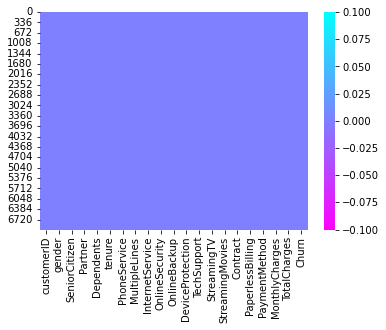

In [36]:
#lets check the null values again using heatmap
sns.heatmap(data.isnull(),cmap="cool_r")
plt.show()

There is no missing values in any column

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observations:
    we can get the information about the dataset which includes indexing type, column type, non-null values and memory usage.Here we can see there are 3 types of data present, 2 integer data type, 2 float type and remaining 17 columns have object data type.

# Separating numerical and categorical columns

In [38]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=Le.fit_transform(data[i].values.reshape(-1,1))

In [39]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


# Exploratory Data Analysis

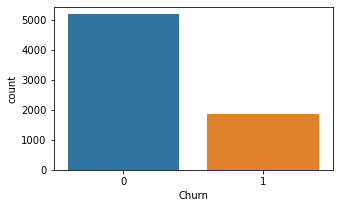

In [40]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=data['Churn'],linewidth=1)
plt.show()

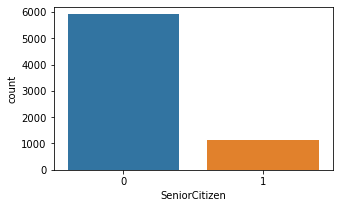

In [41]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=data['SeniorCitizen'],linewidth=1)
plt.show()

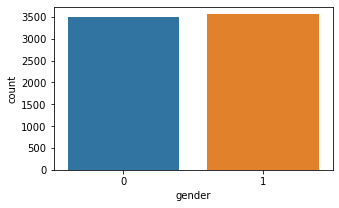

In [42]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=data['gender'],linewidth=1)
plt.show()

0    3641
1    3402
Name: Partner, dtype: int64


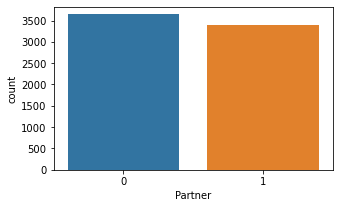

In [43]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=data['Partner'],linewidth=1)
print(data['Partner'].value_counts())
plt.show()

0    4933
1    2110
Name: Dependents, dtype: int64


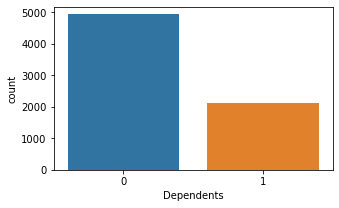

In [44]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=data['Dependents'],linewidth=1)
print(data['Dependents'].value_counts())
plt.show()

1    6361
0     682
Name: PhoneService, dtype: int64


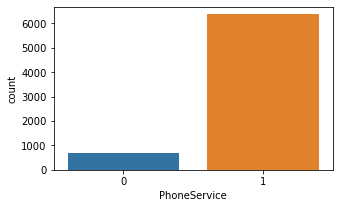

In [46]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=data['PhoneService'],linewidth=1)
print(data['PhoneService'].value_counts())
plt.show()

0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64


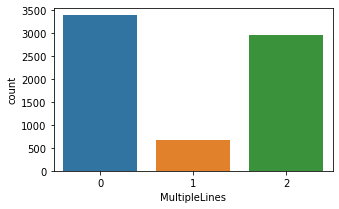

In [47]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=data['MultipleLines'],linewidth=1)
print(data['MultipleLines'].value_counts())
plt.show()

1    3096
0    2421
2    1526
Name: InternetService, dtype: int64


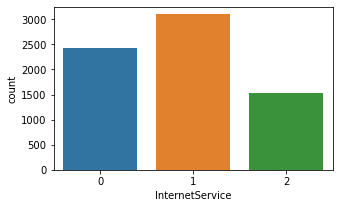

In [48]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=data['InternetService'],linewidth=1)
print(data['InternetService'].value_counts())
plt.show()

0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64


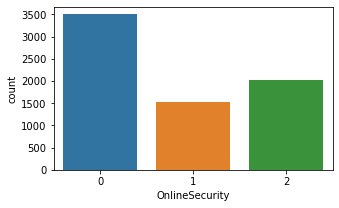

In [49]:
plt.figure(figsize=(5,3))
ax=sns.countplot(x=data['OnlineSecurity'],linewidth=1)
print(data['OnlineSecurity'].value_counts())
plt.show()

0    2810
2    2707
1    1526
Name: StreamingTV, dtype: int64


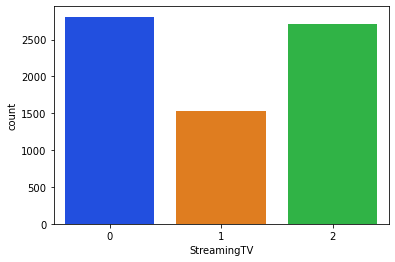

In [52]:
# visualizing how many customers have StreamingTV
print(data["StreamingTV"].value_counts())
sns.countplot(data["StreamingTV"],palette="bright")
plt.show()

0    2785
2    2732
1    1526
Name: StreamingMovies, dtype: int64


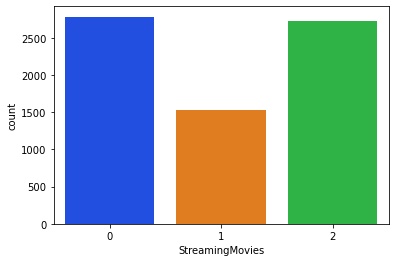

In [53]:
# visualizing how many customers have StreamingMovies
print(data["StreamingMovies"].value_counts())
sns.countplot(data["StreamingMovies"],palette="bright")
plt.show()

0    3875
2    1695
1    1473
Name: Contract, dtype: int64


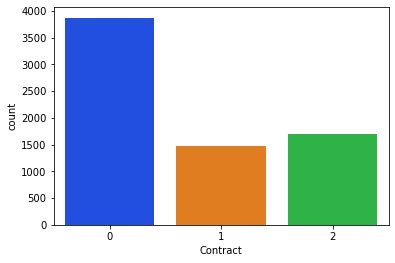

In [55]:
# visualizing how many customers have Contract
print(data["Contract"].value_counts())
sns.countplot(data["Contract"],palette="bright")
plt.show()

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64


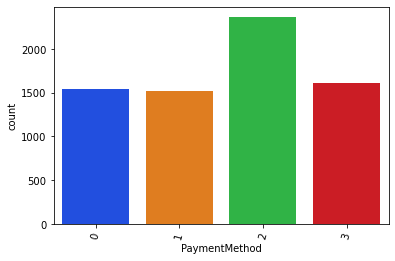

In [56]:
# visualize how many customers have Contract
print(data['PaymentMethod'].value_counts())
sns.countplot(data['PaymentMethod'],palette='bright')
plt.xticks(rotation=75)
plt.show()

In [50]:
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Here we can see the max,min values of complete dataset

# Plotting numerical columns

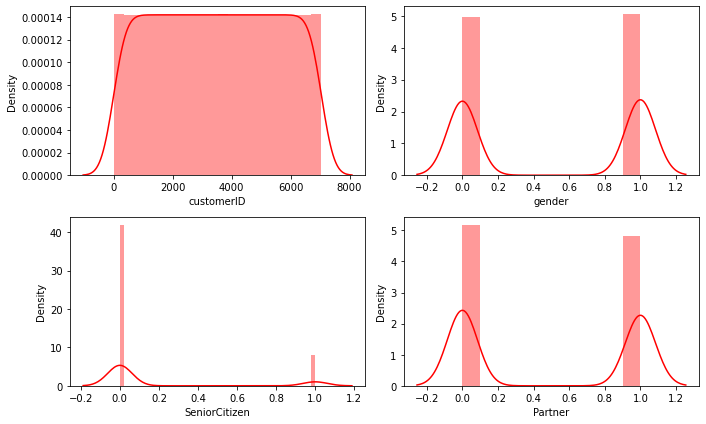

In [59]:
# let's check how the data has been distributed in remaining columns

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column],color="r")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

we can notice that the data almost looks normal in all the columns except SeniorCitizen and the data in the column TotalCharges is skewed to right Other two columns tenure and MonthlyCharges do not have skewness.

# checking correlation with target variable

In [65]:
data.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

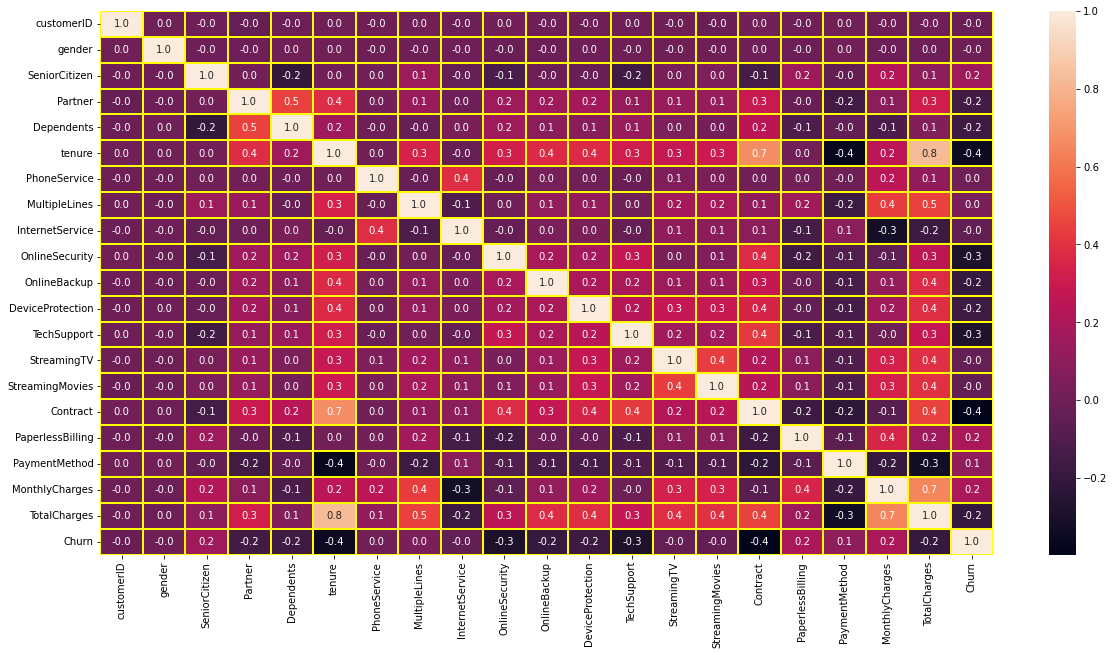

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,linewidths=.1,linecolor='yellow',fmt='.1f')

we can analyse that target variable 'Churn' are not much positively correlated.showing high positive correlation with 'Monthlycharges' and 'paperlessbilling' mostly are negatively correlated

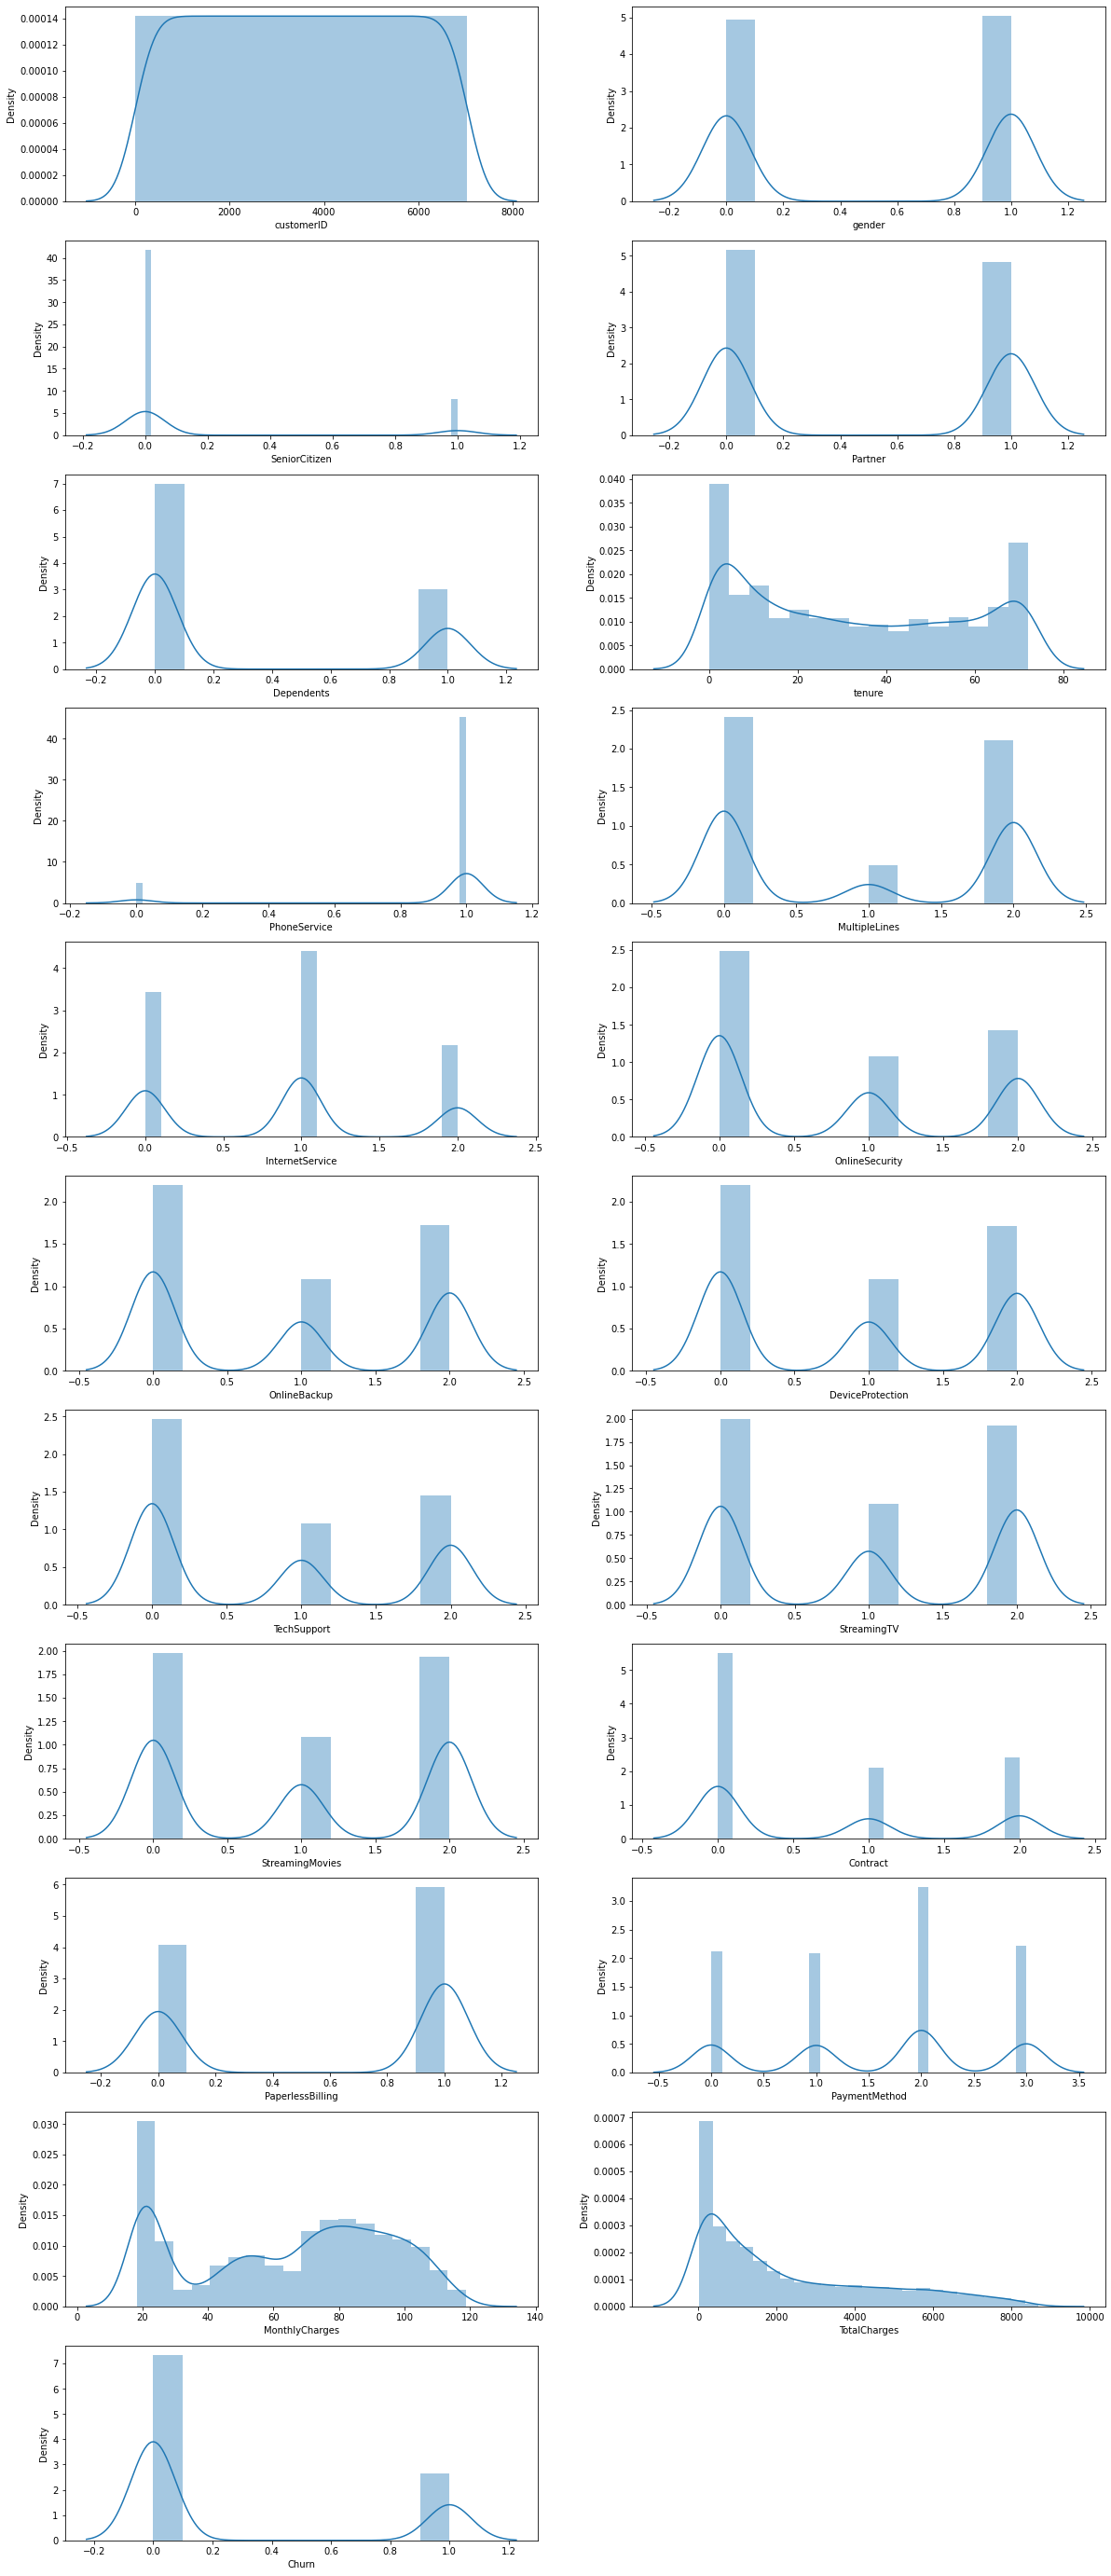

In [67]:
plt.figure(figsize=(20,50),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=22:
        ax=plt.subplot(11,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

we can analyse the distribution and as some part of data going out from the normal distribution thus it shows that there are some outliers present.

# Identifying the outliers

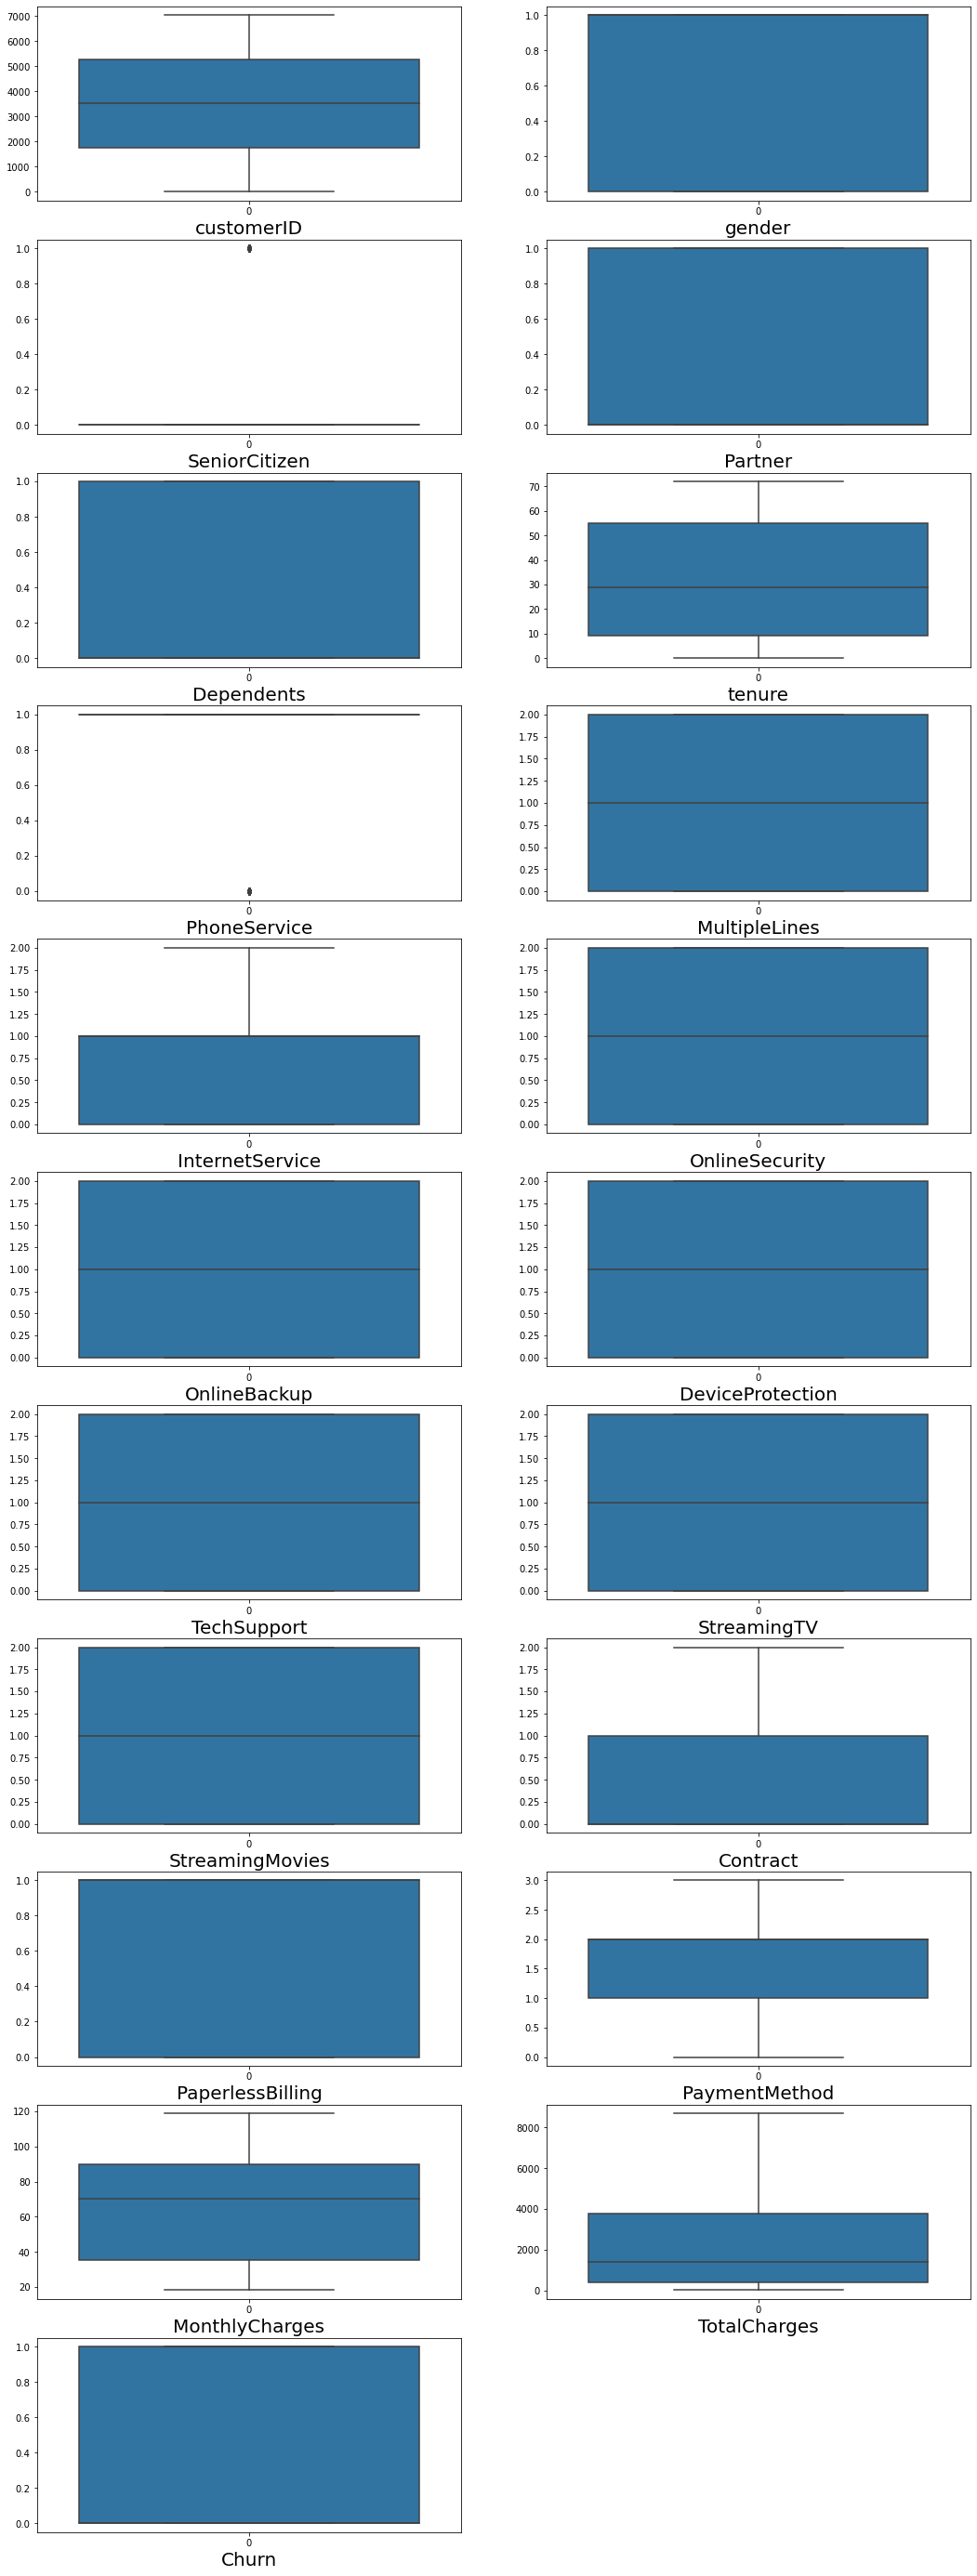

In [68]:
#Let's plot boxplot

plt.figure(figsize=(18,50))
graph=1
for column in data:
    if plotnumber<=22:
        ax=plt.subplot(11,2,graph)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

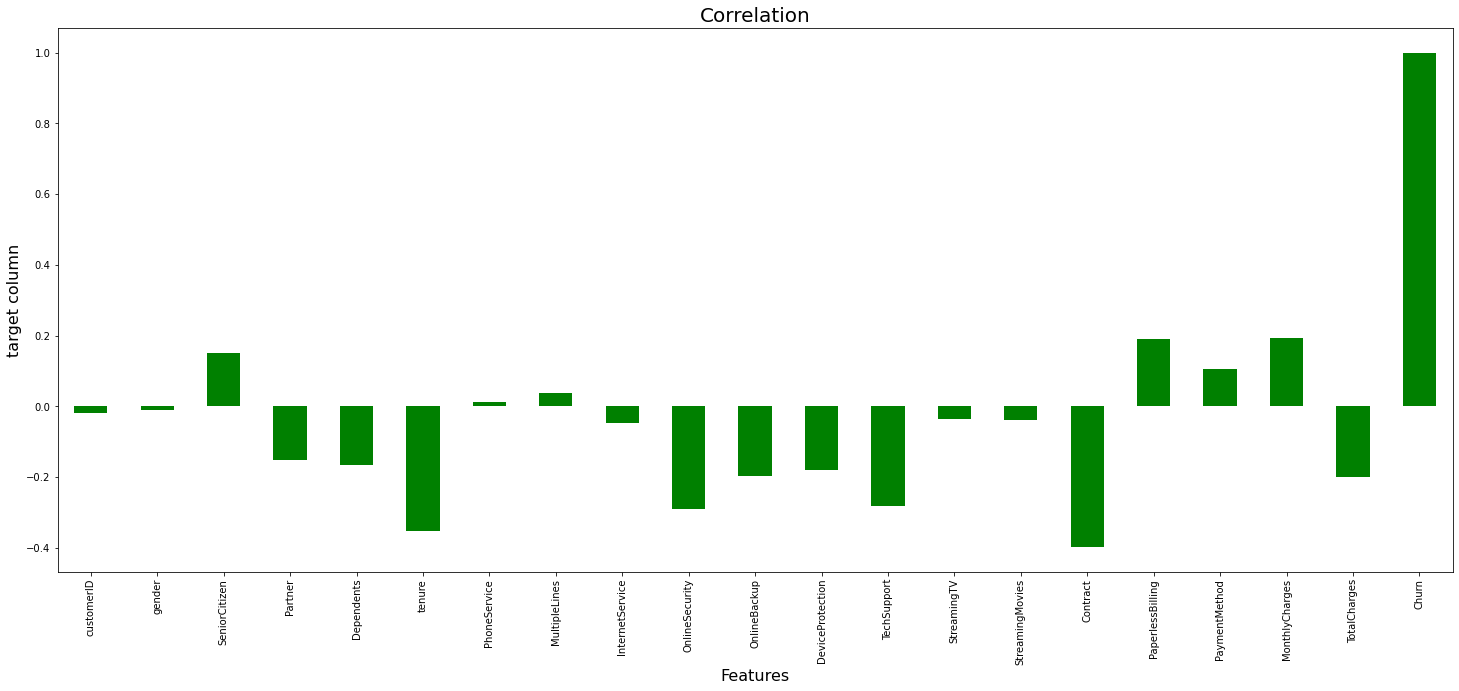

In [70]:
plt.figure(figsize=(25,10))
data.corr()['Churn'].plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=16)
plt.ylabel('target column',fontsize=16)
plt.title('Correlation',fontsize=20)
plt.show()

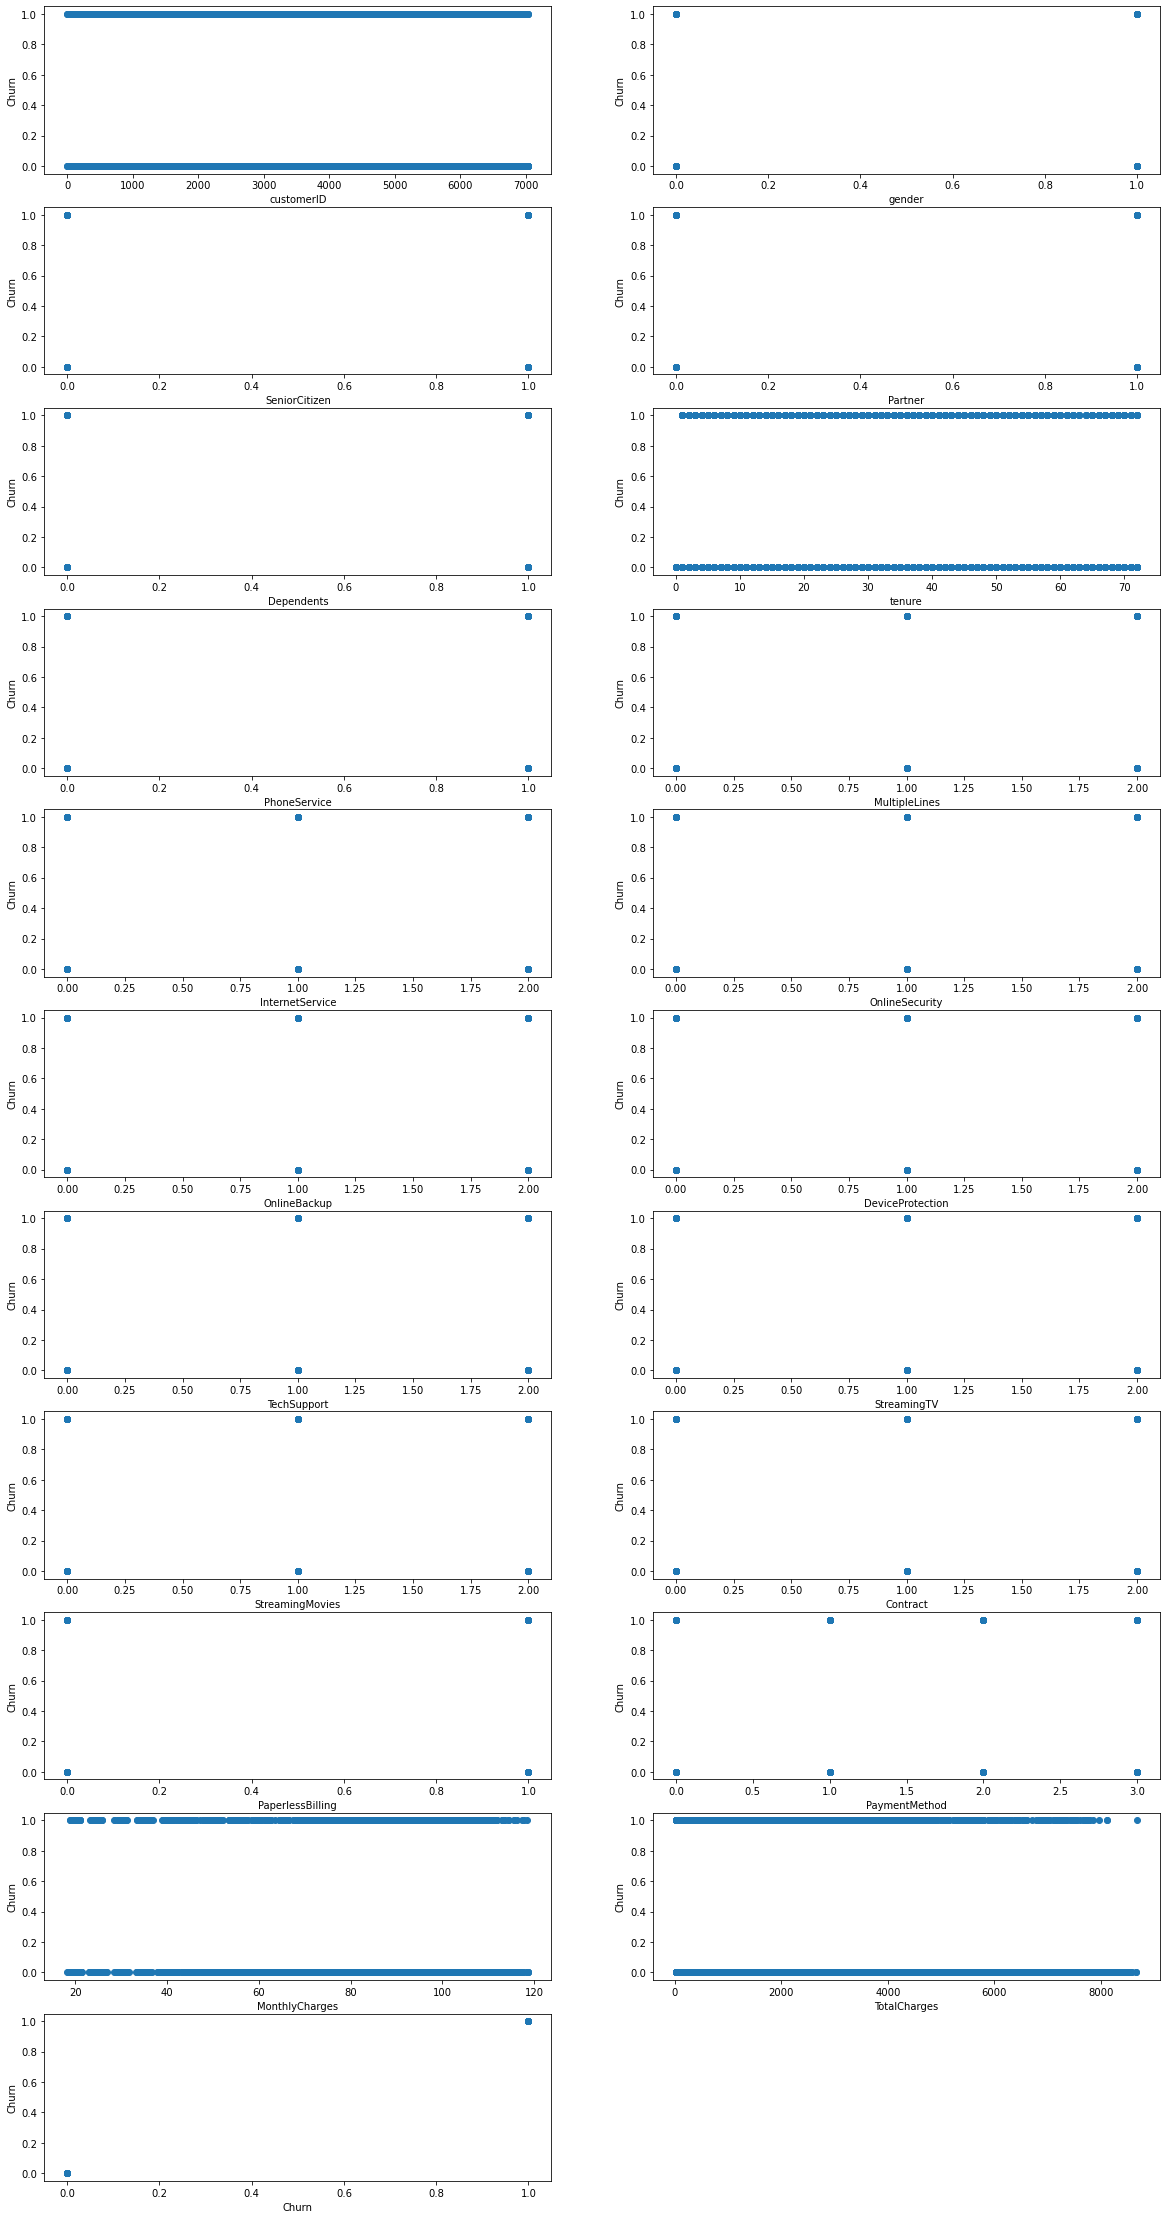

In [71]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=22:
        ax=plt.subplot(11,2,plotnumber)
        plt.scatter(data[column],data["Churn"])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Churn', fontsize=10)
    plotnumber+=1
plt.show()

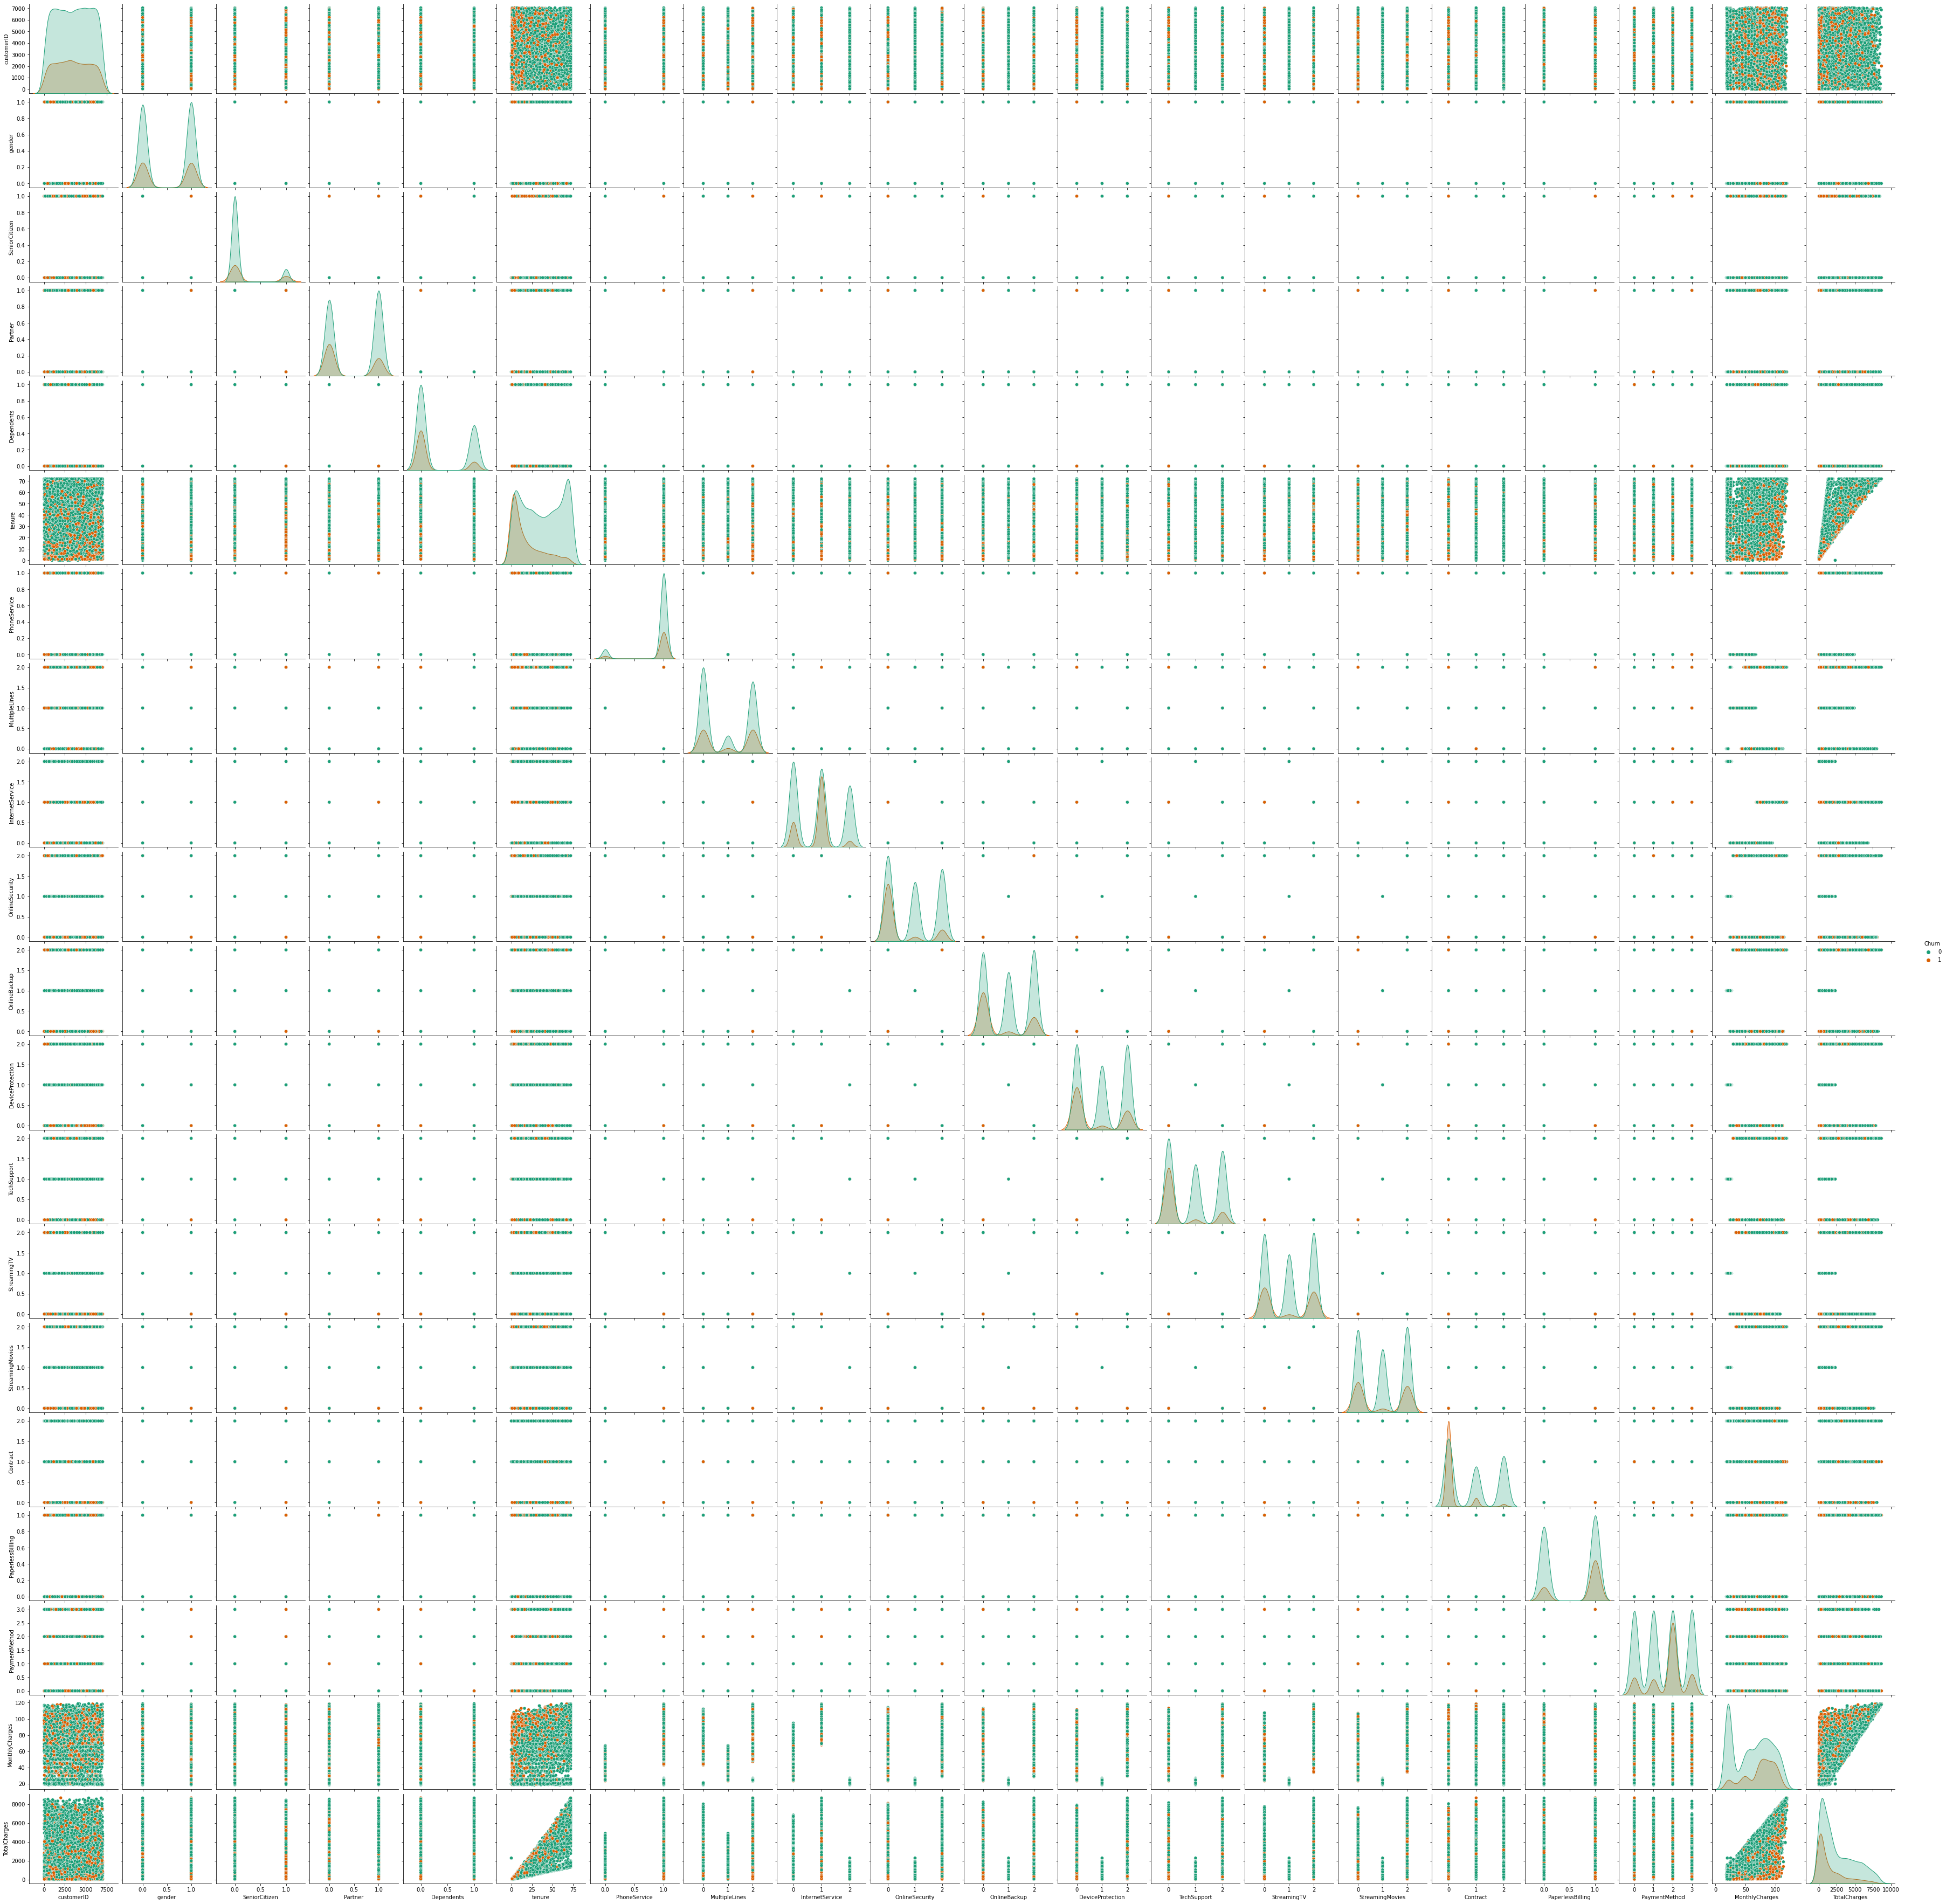

In [75]:
#multivariate analysis
sns.pairplot(data,hue='Churn',palette="Dark2")
plt.show()

# Checking the skewness

In [72]:
data.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

In [73]:
data.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

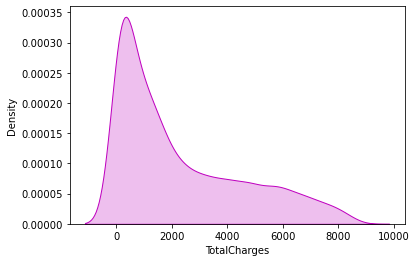

In [76]:
# let's visualize how the data has been distributed in TotalCharges after removing skewness
sns.distplot(data['TotalCharges'],color="m",kde_kws={"shade":True},hist=False)
plt.show()

In [74]:
#split the data into features and labels
x=data.drop("Churn",axis=1)
y=data['Churn']

# Scaling the data using MinMaxScaler

In [77]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
sclaer=mns.fit_transform(x)

In [79]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [80]:
x_train, x_test, y_train, y_test = train_test_split(sclaer,y, test_size=0.3, random_state=49)

Checking Variance Inflation Factor (VIF)

In [84]:
# finding varience inflation factor in each scaled column i.e. x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
               for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.703222,customerID
1,1.960498,gender
2,1.369732,SeniorCitizen
3,2.822017,Partner
4,1.963586,Dependents
5,15.081652,tenure
6,15.253887,PhoneService
7,2.754611,MultipleLines
8,4.353280,InternetService
9,2.259471,OnlineSecurity


Observations:
    Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features.
    We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF (above 10)

In [85]:
# droping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [86]:
# again checking VIF value to confirm whether the multicolinearity  still exists or not
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,VIF values,features
0,3.540084,customerID
1,1.940090,gender
2,1.367360,SeniorCitizen
3,2.821047,Partner
4,1.955312,Dependents
5,7.485257,tenure
6,14.461374,PhoneService
7,2.754302,MultipleLines
8,4.323866,InternetService
9,2.257386,OnlineSecurity


In [87]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

We can obsrve that the data is not balanced to balance the dataset we use oversampling method

# Oversampling

In [88]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [89]:
# checking value vount of target column
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Finally,the data also balanced,we can build our machine learning classification models

So now we can move further to build our machine learning models

# Model building

In [81]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [82]:
lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

print('Training completed')

Training completed


In [83]:
#Let's check the scores now

print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dt.score(x_test,y_test))
print(rf.score(x_test,y_test))

0.8111689540937056
0.7652626597255088
0.7288215806909607
0.8059630856601988


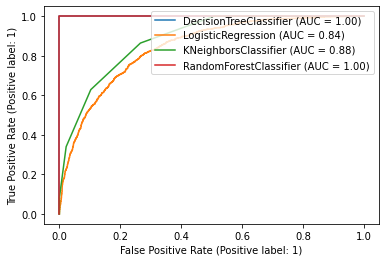

In [92]:
#Confusion Matrix

show=plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=show.ax_)
plot_roc_curve(knn,x_train,y_train,ax=show.ax_)
plot_roc_curve(rf,x_train,y_train,ax=show.ax_)
plt.legend(prop={'size':10}, loc='upper right')
plt.show()

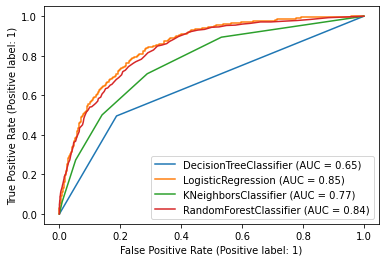

In [93]:
show=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=show.ax_)
plot_roc_curve(knn,x_test,y_test,ax=show.ax_)
plot_roc_curve(rf,x_test,y_test,ax=show.ax_)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

In [94]:
lr_pred = lr.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)

In [95]:
print('Logistic Regression:',accuracy_score(y_test,lr_pred))
print('KNN :',accuracy_score(y_test,knn_pred))
print('Decision Tree :', accuracy_score(y_test,dt_pred))
print('Random Forest :',accuracy_score(y_test,rf_pred))

Logistic Regression: 0.8111689540937056
KNN : 0.7652626597255088
Decision Tree : 0.7288215806909607
Random Forest : 0.8059630856601988


 it is clear that Logistic Regression model is working best for this data, soo let us proceed doing Hyperparameter tuning on LogisticRegression

# Hyperparameter Tuning

In [96]:
# Let's do Hyperparameter tuning using GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [97]:
lr_cv=GridSearchCV(lr,grid,cv=10)

In [98]:
lr_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7981744421906694


# Saving the best model

In [99]:
import joblib

In [100]:
joblib.dump(lr_cv.best_estimator_,"Telecom_customer_churnModel.obj")

['Telecom_customer_churnModel.obj']